pvalue = 0.10570887098598464 if above 0.05 data is not stationary


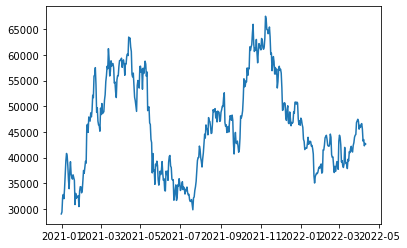

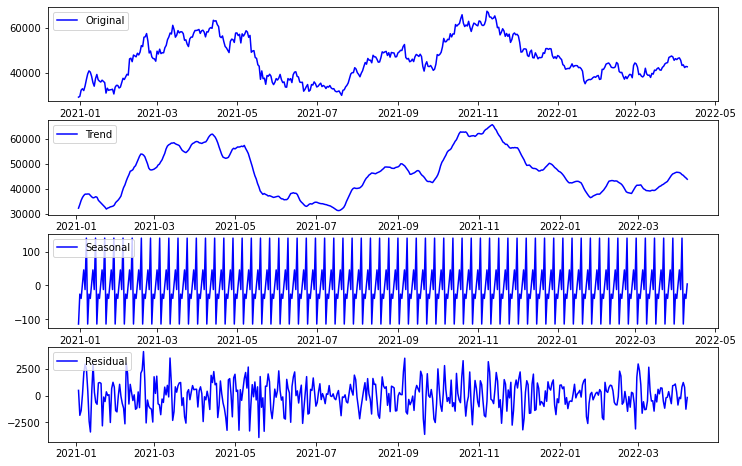

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=8440.693, Time=0.21 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=8439.046, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=8281.117, Time=0.82 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.81 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=8438.756, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=8242.705, Time=3.23 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=8205.107, Time=6.75 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=8194.916, Time=9.87 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=8187.804, Time=18.49 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=33.79 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=19.79 sec
 ARIMA(0,1,0)(5,1,0)[12]             : AIC=8188.287, Time=4.84 sec
 ARIMA(2,1,0)(5,1,0)[12]             : AIC=8189.699, Time=17.73 sec
 ARIMA(1,1,1)(5,1,0)[12]             : AIC=8190.242, Time=24.38 sec
 ARIMA(0,1,1)(5,1,0)[12]     

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Date'>

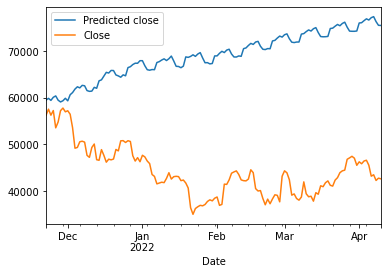

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr 10 17:13:57 2022

@author: kwongsupa
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data as wb

ticker = 'BTC-USD'
df = pd.DataFrame()
df = wb.DataReader(ticker, data_source = 'yahoo', start = '2021-1-1')

plt.plot(df['Close'])

#!pip install pmdarima
#from pmdarima.arima import ADFTest
#adf_test = ADFTest(alpha = 0.05)
#adf_test.should_diff(df)

df = df[['Close']]

from statsmodels.tsa.stattools import adfuller
adf,pvalue,usedlag_,nob_,critical_values_, ic_best_ = adfuller(df)
print("pvalue =",pvalue, "if above 0.05 data is not stationary")

from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(df['Close'],model = 'additive')

trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid



plt.figure(figsize = (12,8))
plt.subplot(411)
plt.plot(df,label = 'Original',color = 'blue')
plt.legend(loc= 'upper left')
plt.subplot(412)
plt.plot(trend,label = 'Trend',color = 'blue')
plt.legend(loc= 'upper left')
plt.subplot(413)
plt.plot(seasonal,label = 'Seasonal',color = 'blue')
plt.legend(loc= 'upper left')
plt.subplot(414)
plt.plot(residual,label = 'Residual',color = 'blue')
plt.legend(loc= 'upper left')
plt.show()



from pmdarima.arima import auto_arima


arima_model = auto_arima(df['Close'],start_p = 1, d=1, start_q =1,
                         max_p = 5, max_q = 5, max_d = 5, m =12, 
                         start_P =0, D =1, start_Q = 0, max_P = 5, max_D = 5, max_Q = 5,
                         seasonal = True,
                         trace = True,
                         error_action = 'ignore',
                         suppress_warnings = True,
                         stepwise = True,
                         n_fits = 100)

print(arima_model.summary())


In [2]:

size = int(len(df)*0.70)
X_train,X_test = df[0:size],df[size:len(df)]


from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(X_train['Close'],
                order = (0,1,1),
                seasonal_order = (5,1,0,12))


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Date'>

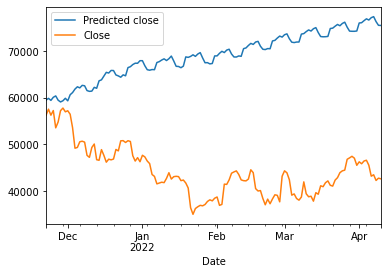

In [3]:

result = model.fit()
result.summary()


start_index = 0 
end_index = len(X_train) - 1
train_prediction = result.predict(start_index,end_index)

start_index = len(X_train)
end_index = len(df) - 1
perdiction = result.predict(start_index,end_index).rename('Predicted close')


perdiction.plot(legend = True)
X_test['Close'].plot(legend = True)
